# Heart disease detection 

In [2]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_rel
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time 

## Load Dataset

In [3]:
# LOAD DATASET

def get_df(path):
    df = pd.read_csv(path) 
    return df

df_path = "../../datasets/heart-disease.csv"

df = get_df(df_path)

display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<center >
    Table 1 - heart-disease.csv Dataset

## Exercise 1

In [4]:
# Definir X (features) e Y (target)
X = df.drop(columns=['target'])
y = df['target']

 
#EX1A
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

knn_scores = cross_val_score(knn, X, y, cv=skf)
nb_scores = cross_val_score(nb, X, y, cv=skf)


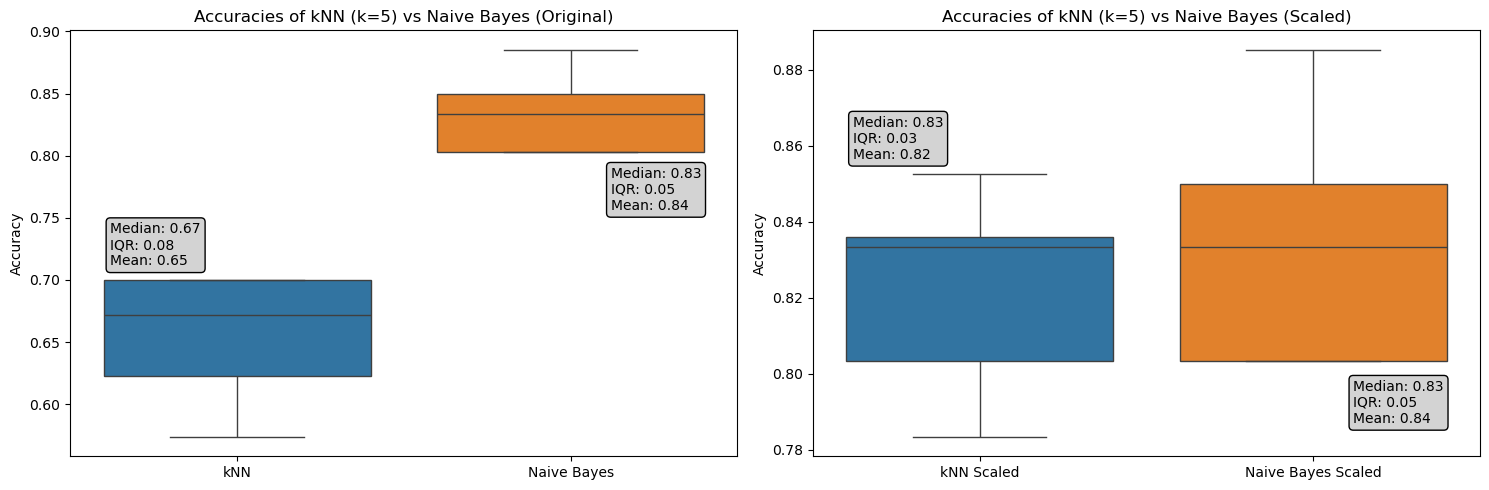

In [5]:
#EX1B

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply the same cross-validation process with scaled data
knn_scores_scaled = cross_val_score(knn, X_scaled, y, cv=skf)
nb_scores_scaled = cross_val_score(nb, X_scaled, y, cv=skf)



# Side by side subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Function to add textboxes in the plots
def add_iqr_and_median_box(ax, data, positions):
    for i, scores in enumerate(data):
        # Q1, Q3, median and mean
        Q1 = np.percentile(scores, 25)
        Q3 = np.percentile(scores, 75)
        median = np.median(scores)
        IQR = Q3 - Q1
        mean = np.mean(scores)

        # Text for textbox
        stats_text = f"Median: {median:.2f}\nIQR: {IQR:.2f}\nMean: {mean:.2f}"

        # Box position
        x_position, y_position = positions[i]

        # Add textbox
        ax.text(x_position, y_position, stats_text, transform=ax.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', 
                                                               edgecolor='black', facecolor='lightgray'))


# First Boxplot: original
sns.boxplot(data=[knn_scores, nb_scores], ax=axes[0])
axes[0].set_title('Accuracies of kNN (k=5) vs Naive Bayes (Original)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['kNN', 'Naive Bayes'])
axes[0].set_ylabel('Accuracy')

# Add annotations to the first boxplot (Original)
add_iqr_and_median_box(axes[0], [knn_scores, nb_scores], positions = [(0.06,0.55), (0.81,0.68)])

# Second Boxplo: Min-Max scaled
sns.boxplot(data=[knn_scores_scaled, nb_scores_scaled], ax=axes[1])
axes[1].set_title('Accuracies of kNN (k=5) vs Naive Bayes (Scaled)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['kNN Scaled', 'Naive Bayes Scaled'])
axes[1].set_ylabel('Accuracy')

# Add annotations to the second boxplot (Scaled)
add_iqr_and_median_box(axes[1], [knn_scores_scaled, nb_scores_scaled], positions = [(0.06,0.80), (0.81,0.18)])

plt.tight_layout()
plt.show()

<center>
    Fig. 1 - Boxplots of the accuracies of kNN and Naive Bayes, for scaled (right) and non-scaled (left) values. 


The boxplot on the left indicates that, for the original values, the median accuracy of the kNN classifier is 0.67, which is comparatively lower to that of the Naive Bayes (NB) classifier. The IQR (0.08) shows that there is notable variability in the accuracy scores as well. This hints that in the kNN performance fluctuates significantly across the folds of cross-validation on the original dataset.
Conversely, the NB classifier shows significantly less variability than kNN (IQR = 0.05) and a higher median accuracy of 0.83. The boxplot's lower spread suggests that NB outperforms kNN on the original dataset, with consistent performance throughout cross-validation folds. 

This might be due to the fact that the kNN is a distance-based classifier, which significantly depends on calculating the distances between data points, as will be shown in the demonstration that follows. Because kNN treats all features identically and because different features in the original dataset may have varying scales and units, larger scale features —like cholesterol— dominate and overshadow smaller-scaled ones. Performance declines as a result of this imbalance. NB doesn't rely on distances between data points. It assumes that features are independent and uses probabilistic models (based on conditional probabilities) to classify the data. 

Meanwhile, the rightmost boxplot reveals that once the features are scaled using MinMaxScaler, kNN performs noticeably better. Compared to the initial unscaled data, the median accuracy improved significantly to 0.83. Additionally, the results' distribution is more tightly packed, suggesting a more constant performance throughout the folds (IQR = 0.03). This illustrates how the kNN algorithm, which depends on distance metrics and is sensitive to the scale of the data, benefits from scaling.
In contrast, NB shows a marginal drop in median accuracy in comparison to the original dataset. The IQR persists. Given that NB is a probabilistic algorithm, it is not intrinsically dependent on feature scaling, which implies that scaling may not be as beneficial to NB.

In [6]:
#EX1C
data = ['Original', 'Scaled']
t_stat_v = []
p_value_v =[]

t_stat, p_value = ttest_rel(knn_scores, nb_scores)
t_stat_v.append(t_stat)
p_value_v.append(p_value)

t_stat_s, p_value_s = ttest_rel(knn_scores_scaled, nb_scores_scaled)
t_stat_v.append(t_stat_s)
p_value_v.append(p_value_s)


stats_df = pd.DataFrame({'Datasets': data, 'T-stat': t_stat_v, 'P-value':p_value_v})
display(stats_df)


,Datasets,T-stat,P-value
0,Original,-6.690315,0.002596
1,Scaled,-0.727052,0.507462


<center>
    Table 2 - T-stat and p-value results for both the original and scaled datasets.

After testing the dataset's scaled and original values, the following conclusions were drawn: 
Since the p-value for the scaled dataset was more than 0.05, we did not have enough information to  reject the null hypothesis and came to the conclusion that the kNN algorithm was not statistically superior.
Since the p-value for the original dataset was significantly less than 0.05, the null hypothesis could be rejected. As a result, the two algorithms' performances differ significantly from one another. The Naive Bayes algorithm outperformed the kNN in classifying the original dataset, evidenced by the negative t-statistic, indicating that the kNN is not statistically superior. 

Note: In this case, due to the nature of the utilized function, we are considering the null hypothesis where the two samples have identical average values.

## Exercise 2

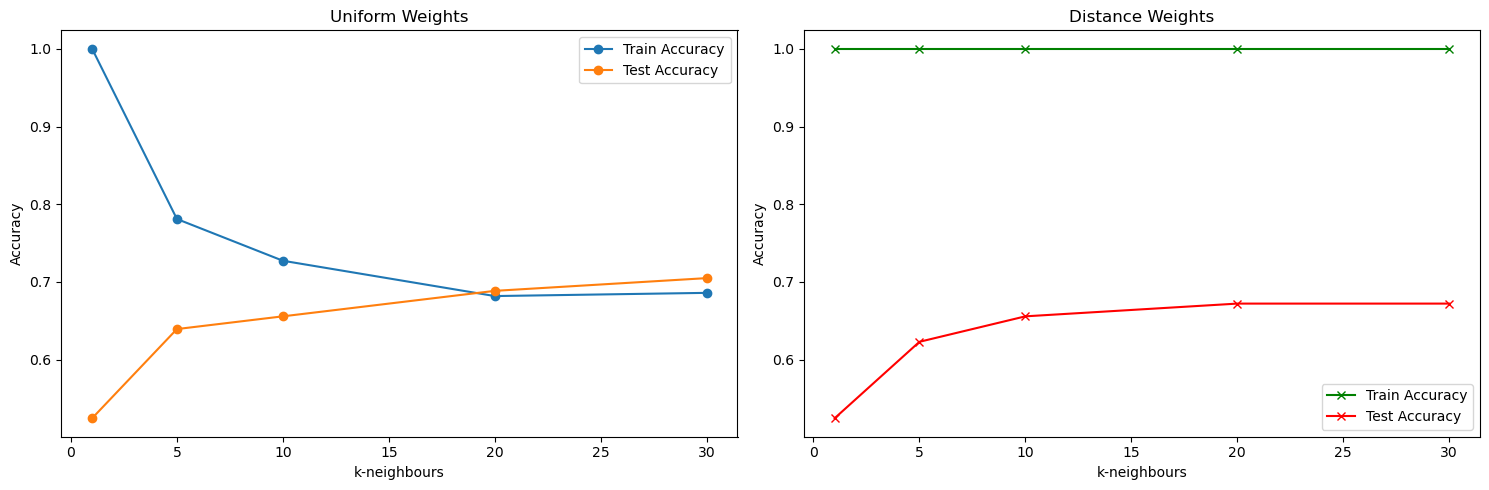

In [7]:
#EX2A

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ks = [1, 5, 10, 20, 30]

train_acc_uniform = []
test_acc_uniform = []
train_acc_distance = []
test_acc_distance = []

times_uniform = []
times_distance = []

for k in ks:

    # For uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')

    start_time = time.time()
    knn_uniform.fit(X_train, y_train)
    end_time = time.time()

    train_acc_uniform.append(knn_uniform.score(X_train, y_train))
    test_acc_uniform.append(knn_uniform.score(X_test, y_test))

    elapsed_time = (end_time - start_time)*1000
    times_uniform.append(elapsed_time)


for k in ks:

    # For distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')

    start_time = time.time()
    knn_distance.fit(X_train, y_train)
    end_time = time.time()

    train_acc_distance.append(knn_distance.score(X_train, y_train))
    test_acc_distance.append(knn_distance.score(X_test, y_test))

    elapsed_time = (end_time - start_time)*1000
    times_distance.append(elapsed_time)


time_df = pd.DataFrame({'k': ks, 'Uniform execution times (ms)':times_uniform, 'Distance execution times (ms)': times_distance})

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Uniform weights plot
axs[0].plot(ks, train_acc_uniform, label='Train Accuracy', marker='o')
axs[0].plot(ks, test_acc_uniform, label='Test Accuracy', marker='o')
axs[0].set_title('Uniform Weights')
axs[0].set_xlabel('k-neighbours')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Distance weights plot
axs[1].plot(ks, train_acc_distance, color = 'green', label='Train Accuracy', marker='x')
axs[1].plot(ks, test_acc_distance, color = 'red', label='Test Accuracy', marker='x')
axs[1].set_title('Distance Weights')
axs[1].set_xlabel('k-neighbours')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


<center>
    Fig. 2 - Testing vs Treining accuracies for kNN with uniform weights and distance weights

In [8]:
display(time_df)

,k,Uniform execution times (ms),Distance execution times (ms)
0,1,7.444382,6.886005
1,5,7.122278,2.738476
2,10,6.232262,5.267859
3,20,4.723549,2.161264
4,30,2.858162,3.740311


<center>
    Table 3 - Executuion time for each number of neighbours and weight. Relevant for higher order k's and larger datsets, for energy and cost economy. 

Different trends between training and test accuracy are observed when comparing the kNN classifier's performance with uniform and distance-based weights. Training accuracy with uniform weights is 100% when k=1, which indicates perfect performance on the training set. Gradually, however, the accuracy declines as k grows. This decrease is anticipated when the model overfits at lower values of k, resulting in memorization of the training set. The model loses sensitivity to individual data points as k grows, which reduces overfitting but also lowers training accuracy.

When k grows, the accuracy on the test set with uniform weights improves and eventually stabilizes. Overfitting is evident for smaller values of k, as there is still a sizable difference between test and training accuracy. While the model works well with training data, it has trouble generalizing to new data, especially when k is small. However, the model starts to generalize better as k grows, even though it still can't strike the ideal balance between test accuracy and training accuracy.

On the other hand, for all values of k, the training accuracy stays 100% while using distance-based weights. This is a result of the model heavily prioritizing nearby neighbors, which makes the model extremely sensitive to the particular configuration of the training set. The model overfits severely as a result of this great sensitivity, providing flawless training performance for all k-values. In spite of this, the test accuracy for weights based on distance is invariably lower and hovers around 70% regardless of the quantity of neighbors taken into account. The model is not generalizing well to new data, and the use of distance-based weighting has resulted in considerable overfitting, as evidenced by the consistent discrepancy between test and training accuracy.


## Exercise 3

Firstly, the "naive" assumption of Naive Bayes is that all features are independent. Many features in the heart-disease dataset, however, probably have correlations. For instance, characteristics like age, blood pressure, and cholesterol are frequently associated with the risk of heart disease. Because Naive Bayes ignores the link between characteristics, this breach of the independence assumption may result in erroneous probability estimates and decreased performance.

On the other hand, the heart-disease dataset contains both categorical (such as sex) and continuous (such as age, blood pressure, cholesterol) features. When working with categorical data, Naive Bayes is usually straightforward. However, when working with continuous features, Naive Bayes assumes that the features follow a normal distribution (Gaussian Naive Bayes). With a mean and variance determined from the data, it uses a Gaussian (normal) distribution to estimate the likelihood of a feature value given a class label. This is where the issues come up: Gaussian Naive Bayes makes the assumption that each class's continuous features, such as age, cholesterol, and blood pressure, are normally distributed. Real-world medical data, however, frequently deviate from this tidy bell-shaped curve. When the data doesn’t fit the normal distribution well, the probability estimates for these features become less reliable, affecting the overall classification.
